In [0]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [0]:
SizeLb = 20
SizeTk = 15
SizeTt = 25
SizeLg = 20

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# IMPORTANDO OS DADOS

In [3]:
# Este arquivo contém as despesas médicas de 5.000 beneficiários no decorrer de 3 anos.
# As linhas abaixo importam esse dataset.
dt_despesas_medicas = pd.read_csv("despesas_medicas.csv", sep=',')
dt_despesas_medicas.head()

,CNAE_ID,PACIENTE_ID,SEXO,ANO_NASCIMENTO,COMPET,CID,PROCEDIMENTO_ID,QTD,VLR_TOTAL
0,1052000,3724852462,M,1934,102017,R53,90211111,5.0,1.26
1,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00
2,NaN,762205882,F,1924,92017,NaN,75208229,1.0,0.66
3,NaN,652221324,M,1928,92017,NaN,75208229,2.0,1.32
4,NaN,723684431,F,2005,32017,J961,75208229,100.0,3.00


In [4]:
dt_despesas_medicas.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840660 entries, 0 to 1840659
Data columns (total 9 columns):
CNAE_ID            854412 non-null object
PACIENTE_ID        1840660 non-null int64
SEXO               1840660 non-null object
ANO_NASCIMENTO     1840660 non-null int64
COMPET             1840660 non-null int64
CID                969591 non-null object
PROCEDIMENTO_ID    1840660 non-null int64
QTD                1840660 non-null float64
VLR_TOTAL          1840660 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 126.4+ MB


In [0]:
# Esse possui a classificação do procedimento
dt_p = pd.read_csv("procedimentos.csv")
dt_p_classificacao = pd.read_csv("procedimentos_classificacao.csv")

In [6]:
dt_p

,PROCEDIMENTO_ID,PROCEDIMENTO_NOME,CLPROCED_ID
0,30301017,ABSCESSO DE PALPEBRA - DRENAGEM,213
1,30101298,ELETROCOAGULACAO DE LESOES DE PELE E MUCOSAS -...,213
2,70877777,ENTRIFLEX SONDA PARA ALIMENTACAO ENTERAL NAO E...,11
3,40304116,ENZIMAS ERITROCITARIAS- (ADENILATOQUINASE- DES...,250
4,90032527,DEXPANTENOL - EPITEGEL 50 MG/G GEL OFT CT BG P...,12
...,...,...,...
10355,70018847,ALCA DE POLIPECTOMIA STANDARD OVAL - SENSATION...,11
10356,77515706,EQUIPO BOMBA INFUSAO GIRASET CRISTAL INJETOR L...,11
10357,70852197,EQUIPO BOMBA INFUSAO P/ ADMINISTRACAO DE SANGUE,11
10358,70237808,EXTRATOR DE CALCULO - SONDA EXTRATORA DE CALCU...,15


In [0]:
dtAux = pd.merge(dt_p,dt_p_classificacao,on='CLPROCED_ID',how='left')

In [0]:
dt_despesas_medicas = pd.merge(dt_despesas_medicas,
                                 dtAux[['GRPROCED_ID','PROCEDIMENTO_ID','CLPROCED_NOME','PROCEDIMENTO_NOME']],
                                 on='PROCEDIMENTO_ID',how='left')

In [9]:
dt_despesas_medicas.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840660 entries, 0 to 1840659
Data columns (total 12 columns):
CNAE_ID              854412 non-null object
PACIENTE_ID          1840660 non-null int64
SEXO                 1840660 non-null object
ANO_NASCIMENTO       1840660 non-null int64
COMPET               1840660 non-null int64
CID                  969591 non-null object
PROCEDIMENTO_ID      1840660 non-null int64
QTD                  1840660 non-null float64
VLR_TOTAL            1840660 non-null float64
GRPROCED_ID          1840630 non-null float64
CLPROCED_NOME        1840630 non-null object
PROCEDIMENTO_NOME    1840630 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 182.6+ MB


In [10]:
dt_cnaes = pd.read_csv("cnaes.csv")
dt_cnaes.head()

,CNAE_ID,CNAE_DESCRICAO
0,0111301,Cultivo de arroz
1,0111302,Cultivo de milho
2,0111303,Cultivo de trigo
3,0111399,Cultivo de outros cereais não especificados an...
4,0112101,Cultivo de algodão herbáceo


# PREPARAÇÃO DOS DADOS

## IDADE

In [0]:
# Criação de variáveis relacionadas ao momento que ocorreu a consulta
dt_despesas_medicas['DATA_REF_EVENTO'] = pd.to_datetime(dt_despesas_medicas['COMPET'] , format='%m%Y')
dt_despesas_medicas['ANO_REF_EVENTO'] = pd.to_datetime(dt_despesas_medicas['DATA_REF_EVENTO']).apply(lambda x: x.strftime('%Y'))
dt_despesas_medicas['ANO_REF_EVENTO_NUM'] = pd.to_numeric(dt_despesas_medicas['ANO_REF_EVENTO'])

In [0]:
# Deleta dados de pessoas que o sistema diz que foram atendidas antes de 2015, pois foi erro
dt_despesas_medicas = dt_despesas_medicas[dt_despesas_medicas['ANO_REF_EVENTO_NUM'] > 2015]

In [0]:
# Cálculo da idade
dt_despesas_medicas['IDADE'] = dt_despesas_medicas['ANO_REF_EVENTO_NUM']-dt_despesas_medicas['ANO_NASCIMENTO']

In [15]:
# Categorização das idades segundo os planos de saúde
dt_despesas_medicas['FaixaEtaria'] = 0
dt_despesas_medicas['CodFaixaEtaria'] = 0
dt_despesas_medicas.loc[dt_despesas_medicas['IDADE'] <= 18, ['FaixaEtaria','CodFaixaEtaria']] = "0-18",1
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 19) & (dt_despesas_medicas['IDADE'] < 24), ['FaixaEtaria','CodFaixaEtaria']] = "19-23",2
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 24) & (dt_despesas_medicas['IDADE'] < 29), ['FaixaEtaria','CodFaixaEtaria']] = "24-28",3
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 29) & (dt_despesas_medicas['IDADE'] < 34), ['FaixaEtaria','CodFaixaEtaria']] = "29-33",4
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 34) & (dt_despesas_medicas['IDADE'] < 39), ['FaixaEtaria','CodFaixaEtaria']] = "34-38",5
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 39) & (dt_despesas_medicas['IDADE'] < 44), ['FaixaEtaria','CodFaixaEtaria']] = "39-43",6
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 44) & (dt_despesas_medicas['IDADE'] < 49), ['FaixaEtaria','CodFaixaEtaria']] = "44-48",7
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 49) & (dt_despesas_medicas['IDADE'] < 54), ['FaixaEtaria','CodFaixaEtaria']] = "49-53",8
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 54) & (dt_despesas_medicas['IDADE'] < 59), ['FaixaEtaria','CodFaixaEtaria']] = "54-58",9
dt_despesas_medicas.loc[(dt_despesas_medicas['IDADE'] >= 59), ['FaixaEtaria','CodFaixaEtaria']] = "59 ou mais",10

dt_despesas_medicas.groupby(['CodFaixaEtaria'],  as_index=False).mean()

,CodFaixaEtaria,PACIENTE_ID,ANO_NASCIMENTO,COMPET,PROCEDIMENTO_ID,QTD,VLR_TOTAL,GRPROCED_ID,ANO_REF_EVENTO_NUM,IDADE
0,1,1.956558e+09,2008.911581,74112.973227,4.126846e+07,32.802869,130.908949,2.789718,2017.252204,8.340623
1,2,2.066408e+09,1995.905734,74150.475021,4.036920e+07,41.440423,116.654841,2.620043,2017.190309,21.284575
2,3,2.202473e+09,1991.502539,69121.532447,4.205237e+07,42.023240,120.381582,2.562237,2017.313856,25.811317
3,4,2.171364e+09,1985.881528,70834.856298,4.145778e+07,17.796458,135.995776,2.478489,2017.279235,31.397707
4,5,2.046555e+09,1981.367872,71342.250471,4.094520e+07,22.646596,148.946003,2.466905,2017.395908,36.028036
5,6,2.185597e+09,1976.546113,69910.379749,4.339819e+07,8.717729,155.266546,2.537972,2017.402470,40.856357
6,7,2.152091e+09,1971.291147,71938.107183,4.281822e+07,12.850378,144.322333,2.591889,2017.253005,45.961858
7,8,2.195502e+09,1966.046826,70544.992980,4.218261e+07,19.030147,138.108439,2.585654,2017.216256,51.169430
8,9,2.196663e+09,1961.163717,71747.371527,4.704131e+07,10.859145,151.739507,2.605834,2017.221278,56.057561
9,10,2.092177e+09,1941.287613,70618.081980,4.397301e+07,19.123799,128.256641,2.692482,2017.287925,76.000312


## SEXO

In [0]:
# SEXO (M:1, F:2)
dt_despesas_medicas['SEXO_CAT'] = 0
dt_despesas_medicas.loc[dt_despesas_medicas['SEXO'] == 'M', 'SEXO_CAT'] = 1
dt_despesas_medicas.loc[dt_despesas_medicas['SEXO'] == 'F', 'SEXO_CAT'] = 2

## DF DE CADA PACIENTE

In [0]:
# Criando data frame com os pacientes em cada linha
dfPaciente = dt_despesas_medicas.groupby(['PACIENTE_ID'], as_index=False).mean()[['PACIENTE_ID','SEXO_CAT',
                                                                                  'IDADE','CodFaixaEtaria']]

In [18]:
dfPaciente

,PACIENTE_ID,SEXO_CAT,IDADE,CodFaixaEtaria
0,740255,2.0,65.692140,10.0
1,1462618,2.0,80.165049,10.0
2,2531830,1.0,77.869591,10.0
3,4263234,2.0,83.811940,10.0
4,4293611,2.0,20.273381,2.0
...,...,...,...,...
4973,4288966713,1.0,69.812500,10.0
4974,4289938973,1.0,57.362069,9.0
4975,4291324891,1.0,65.106383,10.0
4976,4293790153,1.0,52.441463,8.0


In [0]:
# Adiciona CNAE ao dfPaciente
dfPaciente = pd.merge(dfPaciente,dt_despesas_medicas.drop_duplicates(subset='PACIENTE_ID', keep="first")[['PACIENTE_ID','CNAE_ID']]
                      ,on='PACIENTE_ID',how='inner')

In [0]:
# Adiciona descrição do CNAE ao dfPaciente
dfPaciente = pd.merge(dfPaciente,dt_cnaes.drop_duplicates(subset='CNAE_ID', keep="first"),on='CNAE_ID',how='left')

Existem dados com número do cnae, mas sem descrição

In [0]:
# Código da faixa etária aproxima para cima (ao calcular a média da faixa no período, pessoas foram para a faixa de cima)
dfPaciente['CodFaixaEtaria'] = np.ceil(dfPaciente['CodFaixaEtaria'])

## ESTATÍSTICA

In [24]:
# Criação de variáveis estatísticas relacionadas aos valores dos procedimentos, valor total,
# grau dos procedimentos e consultas que podemos melhorar
dfPaciente['COUNT_MESES'] = 0
dfPaciente['COUNT_PROC'] = 0
dfPaciente['VLR_SUM'] = 0
dfPaciente['VLR_MEAN'] = 0
dfPaciente['VLR_MEDIAN'] = 0
dfPaciente['VLR_MIN'] = 0
dfPaciente['VLR_MAX'] = 0
dfPaciente['VLR_STD'] = 0
dfPaciente['VLR_SKEW'] = 0
dfPaciente['VLR_KURT'] = 0

dfPaciente['PRD_SEM'] = 0
dfPaciente['PRD_CONS'] = 0
dfPaciente['PRD_EXM'] = 0
dfPaciente['PRD_OUT'] = 0
dfPaciente['PRD_TER'] = 0
dfPaciente['PRD_INT'] = 0

dfPaciente['PRDVL_SEM'] = 0
dfPaciente['PRDVL_CONS'] = 0
dfPaciente['PRDVL_EXM'] = 0
dfPaciente['PRDVL_OUT'] = 0
dfPaciente['PRDVL_TER'] = 0
dfPaciente['PRDVL_INT'] = 0

dfPaciente['COUNT_FOCO'] = 0
dfPaciente['VLR_FOCO'] = 0
dfPaciente['VLR_FOCOpTOT'] = 0

dfPaciente['GRP_SUM'] = 0
dfPaciente['GRP_SKEW'] = 0
dfPaciente['GRP_MEAN'] = 0
dfPaciente['GRP_SKEW1'] = 0
dfPaciente['GRP_MEAN1'] = 0
dfPaciente['GRP_SKEW2'] = 0
dfPaciente['GRP_MEAN2'] = 0

ProcedIDFoco = [10101012,10101039] # Consultas que vamos afetar


for i in dt_despesas_medicas['PACIENTE_ID'].unique():
  dfAux = dt_despesas_medicas[dt_despesas_medicas['PACIENTE_ID'] == i]
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['COUNT_MESES']] = len(dfAux['COMPET'].unique())
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['COUNT_PROC']] = dfAux['VLR_TOTAL'].count()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_SUM']] = dfAux['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_MEAN']] = dfAux['VLR_TOTAL'].mean()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_MEDIAN']] = dfAux['VLR_TOTAL'].median()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_MIN']] = dfAux['VLR_TOTAL'].min()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_MAX']] = dfAux['VLR_TOTAL'].max()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_STD']] = dfAux['VLR_TOTAL'].std()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_SKEW']] = dfAux['VLR_TOTAL'].skew()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_KURT']] = dfAux['VLR_TOTAL'].kurt()

  
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRD_SEM']] = np.sum(dfAux['GRPROCED_ID']==0)
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRD_CONS']] = np.sum(dfAux['GRPROCED_ID']==1)
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRD_EXM']] = np.sum(dfAux['GRPROCED_ID']==2)
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRD_OUT']] = np.sum(dfAux['GRPROCED_ID']==3)
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRD_TER']] = np.sum(dfAux['GRPROCED_ID']==4)
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRD_INT']] = np.sum(dfAux['GRPROCED_ID']==5)

  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRDVL_SEM']] = dfAux[dfAux['GRPROCED_ID']==0]['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRDVL_CONS']] = dfAux[dfAux['GRPROCED_ID']==1]['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRDVL_EXM']] = dfAux[dfAux['GRPROCED_ID']==2]['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRDVL_OUT']] = dfAux[dfAux['GRPROCED_ID']==3]['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRDVL_TER']] = dfAux[dfAux['GRPROCED_ID']==4]['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['PRDVL_INT']] = dfAux[dfAux['GRPROCED_ID']==5]['VLR_TOTAL'].sum()

  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['COUNT_FOCO']] = np.sum(dfAux['PROCEDIMENTO_ID'].isin(ProcedIDFoco))
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_FOCO']] = dfAux[dfAux['PROCEDIMENTO_ID'].isin(ProcedIDFoco)]['VLR_TOTAL'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['VLR_FOCOpTOT']] = dfAux[dfAux['PROCEDIMENTO_ID'].isin(ProcedIDFoco)]['VLR_TOTAL'].sum()/dfAux['VLR_TOTAL'].sum()*100

  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_SUM']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])['GRPROCED_ID'].sum()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_SKEW']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])['GRPROCED_ID'].skew()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_MEAN']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])['GRPROCED_ID'].mean()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_SKEW2']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])[dfAux['ANO_REF_EVENTO_NUM']>=2018]['GRPROCED_ID'].skew()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_SKEW1']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])[dfAux['ANO_REF_EVENTO_NUM']<2018]['GRPROCED_ID'].skew()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_MEAN2']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])[dfAux['ANO_REF_EVENTO_NUM']>=2018]['GRPROCED_ID'].mean()
  dfPaciente.loc[dfPaciente['PACIENTE_ID'] == i, ['GRP_MEAN1']] = dfAux.sort_values(['DATA_REF_EVENTO','GRPROCED_ID'])[dfAux['ANO_REF_EVENTO_NUM']<2018]['GRPROCED_ID'].mean()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [0]:
# Modificação da média e do skewness comparando antes e depois de 2018
dfPaciente['GRP_MEANd'] = dfPaciente['GRP_MEAN2']-dfPaciente['GRP_MEAN1']
dfPaciente['GRP_SKEWd'] = dfPaciente['GRP_SKEW2']-dfPaciente['GRP_SKEW1']

In [0]:
# Quantidade de consultas que focamos, dividida pela quantidade total de procedimentos por pessoa
dfPaciente['COUNT_FOCOpTot'] = dfPaciente['COUNT_FOCO'] / dfPaciente['COUNT_PROC'] * 100

In [74]:
dfPaciente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 0 to 4977
Data columns (total 41 columns):
PACIENTE_ID       4978 non-null int64
SEXO_CAT          4978 non-null float64
IDADE             4978 non-null float64
CodFaixaEtaria    4978 non-null float64
CNAE_ID           2862 non-null object
CNAE_DESCRICAO    1788 non-null object
COUNT_MESES       4978 non-null int64
COUNT_PROC        4978 non-null int64
VLR_SUM           4978 non-null float64
VLR_MEAN          4978 non-null float64
VLR_MEDIAN        4978 non-null float64
VLR_MIN           4978 non-null float64
VLR_MAX           4978 non-null float64
VLR_STD           4978 non-null float64
VLR_SKEW          4978 non-null float64
VLR_KURT          4978 non-null float64
PRD_SEM           4978 non-null int64
PRD_CONS          4978 non-null int64
PRD_EXM           4978 non-null int64
PRD_OUT           4978 non-null int64
PRD_TER           4978 non-null int64
PRD_INT           4978 non-null int64
PRDVL_SEM         4978 non-null f

In [75]:
dfPaciente.head()

,PACIENTE_ID,SEXO_CAT,IDADE,CodFaixaEtaria,CNAE_ID,CNAE_DESCRICAO,COUNT_MESES,COUNT_PROC,VLR_SUM,VLR_MEAN,VLR_MEDIAN,VLR_MIN,VLR_MAX,VLR_STD,VLR_SKEW,VLR_KURT,PRD_SEM,PRD_CONS,PRD_EXM,PRD_OUT,PRD_TER,PRD_INT,PRDVL_SEM,PRDVL_CONS,PRDVL_EXM,PRDVL_OUT,PRDVL_TER,PRDVL_INT,COUNT_FOCO,VLR_FOCO,VLR_FOCOpTOT,GRP_SUM,GRP_SKEW,GRP_MEAN,GRP_SKEW1,GRP_MEAN1,GRP_SKEW2,GRP_MEAN2,GRP_MEANd,GRP_SKEWd,COUNT_FOCOpTot
0,740255,2.0,65.692140,10.0,NaN,NaN,21,458,90479.38,197.553231,8.705,0.00,11807.50,961.640372,8.981095,90.447895,0,48,139,252,13,6,0.0,4817.73,29781.23,52934.76,2403.60,542.06,35,3688.01,4.076078,1164.0,-0.211407,2.541485,-0.218291,2.129870,-0.205356,2.624672,0.494802,0.012936,7.641921
1,1462618,2.0,80.165049,10.0,NaN,NaN,20,206,37702.05,183.019660,20.140,0.01,2924.15,460.756029,4.376501,20.856117,0,33,145,16,12,0,0.0,4125.44,8213.44,14568.10,10795.07,0.00,33,4125.44,10.942217,419.0,1.050047,2.033981,1.184803,1.957265,0.690762,2.134831,0.177567,-0.494041,16.019417
2,2531830,1.0,77.869591,10.0,6424703,NaN,33,16663,410020.12,24.606621,3.880,0.00,7500.00,169.555984,20.776280,618.978393,0,960,65,15606,32,0,0.0,70157.46,441.08,309973.12,29448.46,0.00,0,0.00,0.000000,48036.0,-3.648959,2.882794,-3.312563,2.861477,-5.448581,2.945991,0.084514,-2.136018,0.000000
3,4263234,2.0,83.811940,10.0,NaN,NaN,28,335,26835.37,80.105582,16.990,0.00,1045.25,169.036937,3.280952,10.647240,0,58,139,133,5,0,0.0,5730.21,6175.14,13365.87,1564.15,0.00,38,4221.26,15.730210,755.0,-0.244463,2.253731,-0.514616,2.369099,0.333741,1.990196,-0.378903,0.848358,11.343284
4,4293611,2.0,20.273381,2.0,NaN,NaN,25,139,18738.57,134.809856,63.090,0.01,1716.62,260.346057,4.110142,19.646096,0,43,63,26,7,0,0.0,4450.96,3621.45,4945.85,5720.31,0.00,39,4354.96,23.240621,275.0,0.565453,1.978417,0.577175,1.788732,0.364220,2.176471,0.387738,-0.212955,28.057554


In [0]:
# Categorização do CNAE
# Esses dados estão muito faltantes e as vezes não corresponde ao paciente, mas ao titular do plano dele
# Se mostrou pouco importante em análises paralelas
dfPaciente['CAT_CNAE'] = 0

dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Comércio",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Lojas",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Padaria",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Lanchonetes",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("representantes comerciais",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Aluguel",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Fotocópias",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Agências de viagens",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("advocatícios",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Corretor",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Suporte técnico",case=False)==True, ['CAT_CNAE']] = 1


dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("educação",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("consultoria",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Treinamento",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Desenvolvimento e licenciamento",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Tratamento de dados",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Desenvolvimento de programas",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("manutenção de computadores",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Confecção de peças do vestuário",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("monitoramento",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("cinematográficos'",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Agências de publicidade",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("ensino",case=False)==True, ['CAT_CNAE']] = 1
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("contabilidade|administrativo",case=False)==True, ['CAT_CNAE']] = 1


dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Fabricação",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Fundição",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("usinagem",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("urbanização",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Extração",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("terraplenagem",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("manutenção e reparação",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("lanternagem",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("manutenção elétrica",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Instalação de máquinas",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Reparação e manutenção",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Construção",case=False)==True, ['CAT_CNAE']] = 2
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("automotores",case=False)==True, ['CAT_CNAE']] = 2


dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Restaurante",case=False)==True, ['CAT_CNAE']] = 3
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Frigorífico",case=False)==True, ['CAT_CNAE']] = 3
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Abate de aves",case=False)==True, ['CAT_CNAE']] = 3
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("alimentos",case=False)==True, ['CAT_CNAE']] = 3

dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Laboratórios clínicos",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("atendimento hospitalar",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("odontológica",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Estética",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("ambulatorial",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("fisioterapia",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("diagnóstico",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("radioterapia",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("patológica",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("saúde humana",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("enfermagem",case=False)==True, ['CAT_CNAE']] = 4
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("prontosocorro|hospitalares",case=False)==True, ['CAT_CNAE']] = 4

dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Transporte|rodoviário",case=False)==True, ['CAT_CNAE']] = 5
dfPaciente.loc[dfPaciente['CNAE_DESCRICAO'].str.contains("Entrega",case=False)==True, ['CAT_CNAE']] = 5

In [0]:
dfPaciente.to_csv('PacienteTot.csv')

## FILTRO DOS PACIENTES

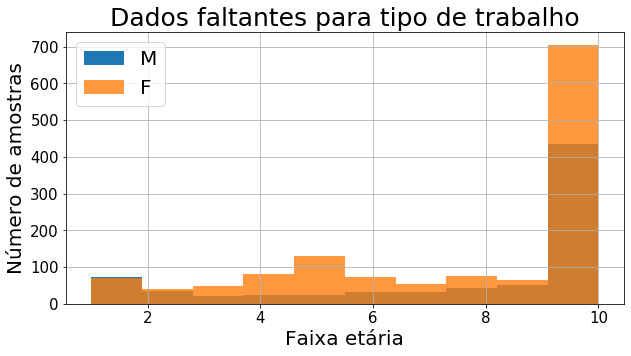

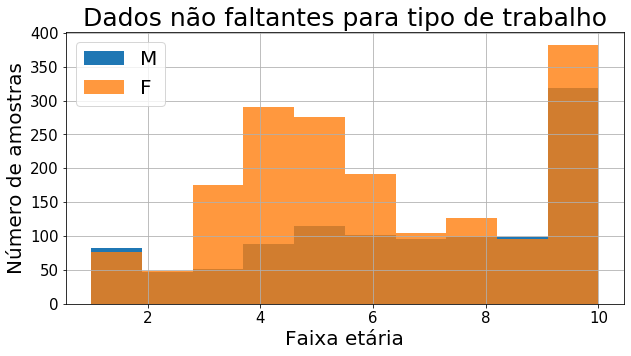

In [126]:
# Existe algum padrão para os dados faltantes? São de idosos aposentados, são de crianças?
# O número de idosos sem dado é maior, então pode ser um motivo, mas não é conclusivo, pois as pessoas não precisam informar.
fig, ax = plt.subplots(figsize=(10,5))
dfPaciente[(dfPaciente['CNAE_ID'].isna()) & (dfPaciente['SEXO_CAT']==1)].hist(column='CodFaixaEtaria', ax=ax, label='M')
dfPaciente[(dfPaciente['CNAE_ID'].isna()) & (dfPaciente['SEXO_CAT']==2)].hist(column='CodFaixaEtaria', ax=ax, label='F',alpha=0.8)
ax.set_xlabel('Faixa etária', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
ax.set_title('Dados faltantes para tipo de trabalho', fontsize=SizeTt)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
dfPaciente[(~dfPaciente['CNAE_ID'].isna()) & (dfPaciente['SEXO_CAT']==1)].hist(column='CodFaixaEtaria', ax=ax, label='M')
dfPaciente[(~dfPaciente['CNAE_ID'].isna()) & (dfPaciente['SEXO_CAT']==2)].hist(column='CodFaixaEtaria', ax=ax, label='F',alpha=0.8)
ax.set_xlabel('Faixa etária', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
ax.set_title('Dados não faltantes para tipo de trabalho', fontsize=SizeTt)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

In [127]:
# Várias crianças com menos de 10 anos que trabalham: valor é dos titulares do plano
dfPaciente[(~dfPaciente['CNAE_ID'].isna()) & (dfPaciente['IDADE']<10)].shape

(113, 42)

In [0]:
# Excluindo categorias de idade 1 e 10 (A ideia é focar nas faixas etárias de trabalhadores)
dfPF = dfPaciente[(dfPaciente['CodFaixaEtaria']>1) & (dfPaciente['CodFaixaEtaria']<10)]

In [129]:
dfPF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 4 to 4976
Data columns (total 42 columns):
PACIENTE_ID       2835 non-null int64
SEXO_CAT          2835 non-null float64
IDADE             2835 non-null float64
CodFaixaEtaria    2835 non-null float64
CNAE_ID           2003 non-null object
CNAE_DESCRICAO    1364 non-null object
COUNT_MESES       2835 non-null int64
COUNT_PROC        2835 non-null int64
VLR_SUM           2835 non-null float64
VLR_MEAN          2835 non-null float64
VLR_MEDIAN        2835 non-null float64
VLR_MIN           2835 non-null float64
VLR_MAX           2835 non-null float64
VLR_STD           2835 non-null float64
VLR_SKEW          2835 non-null float64
VLR_KURT          2835 non-null float64
PRD_SEM           2835 non-null int64
PRD_CONS          2835 non-null int64
PRD_EXM           2835 non-null int64
PRD_OUT           2835 non-null int64
PRD_TER           2835 non-null int64
PRD_INT           2835 non-null int64
PRDVL_SEM         2835 non-null f

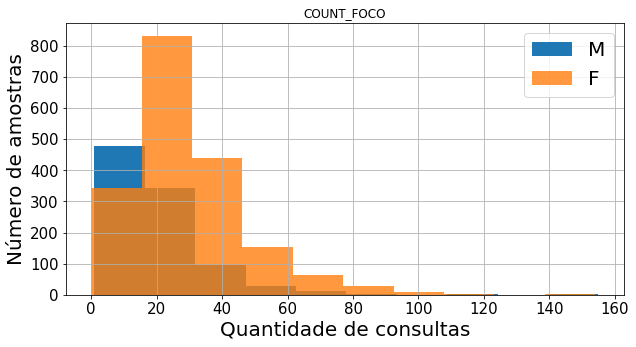

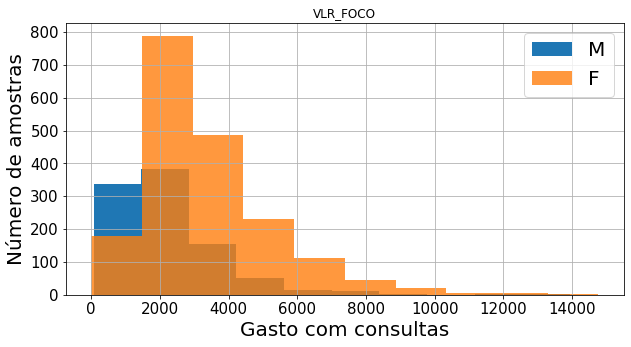

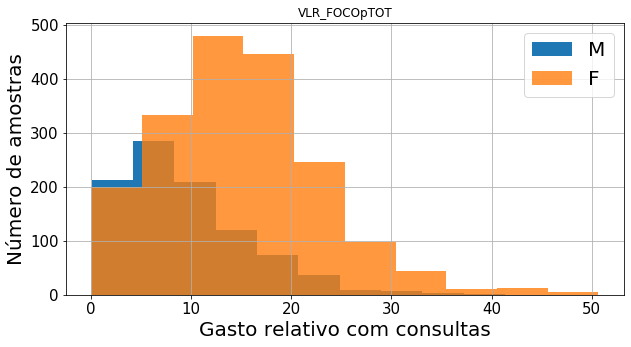

In [130]:
# Algum sexo gasta mais com consultas?
fig, ax = plt.subplots(figsize=(10,5))
dfPF[(dfPF['SEXO_CAT']==1)].hist(column='COUNT_FOCO', ax=ax, label='M')
dfPF[(dfPF['SEXO_CAT']==2)].hist(column='COUNT_FOCO', ax=ax, label='F',alpha=0.8)
ax.set_xlabel('Quantidade de consultas', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
dfPF[(dfPF['SEXO_CAT']==1)].hist(column='VLR_FOCO', ax=ax, label='M')
dfPF[(dfPF['SEXO_CAT']==2)].hist(column='VLR_FOCO', ax=ax, label='F',alpha=0.8)
ax.set_xlabel('Gasto com consultas', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
dfPF[(dfPF['SEXO_CAT']==1)].hist(column='VLR_FOCOpTOT', ax=ax, label='M')
dfPF[(dfPF['SEXO_CAT']==2)].hist(column='VLR_FOCOpTOT', ax=ax, label='F',alpha=0.8)
ax.set_xlabel('Gasto relativo com consultas', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

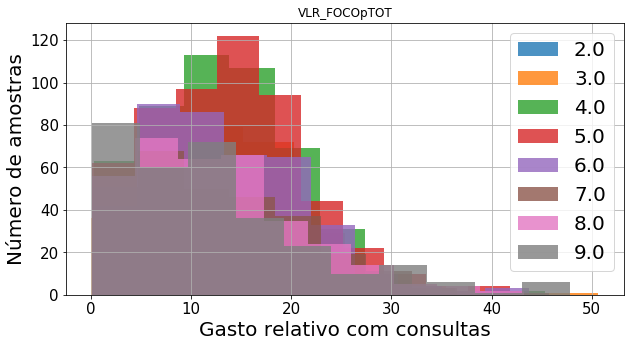

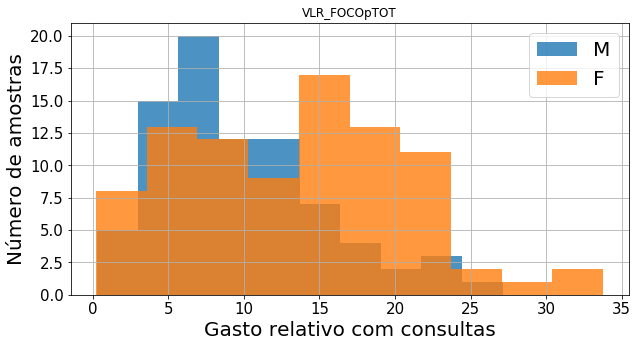

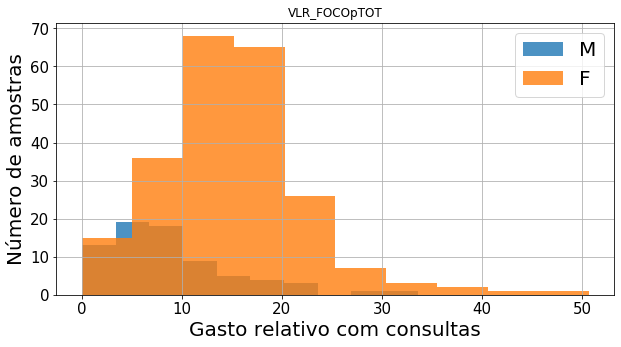

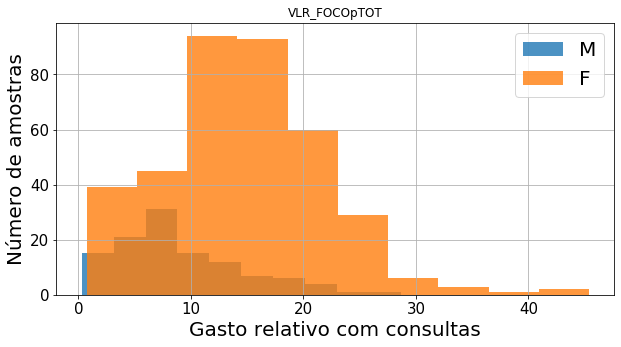

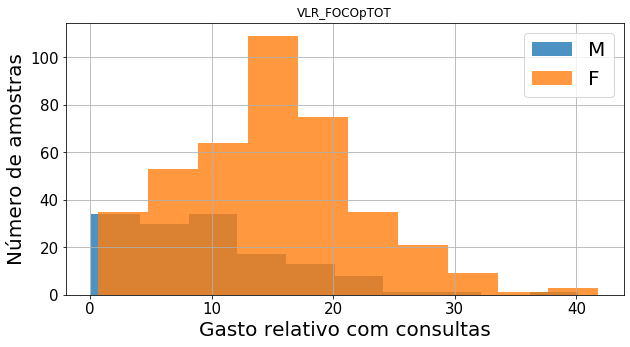

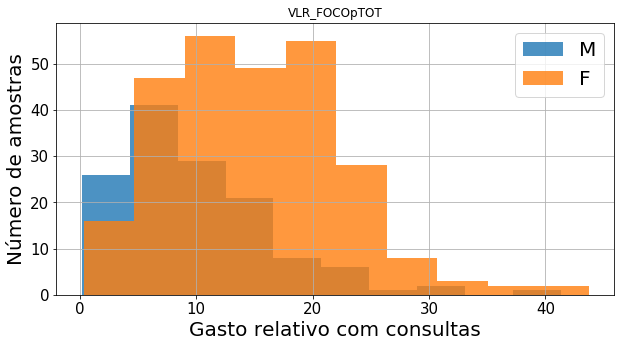

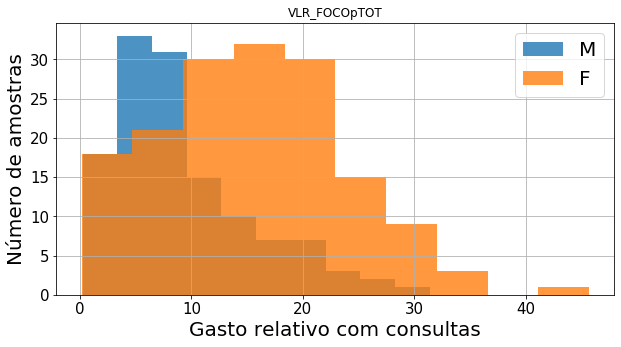

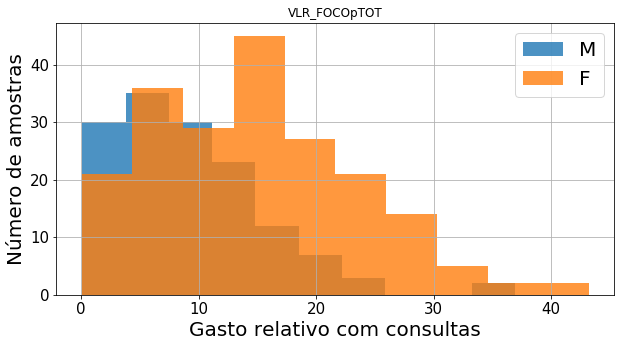

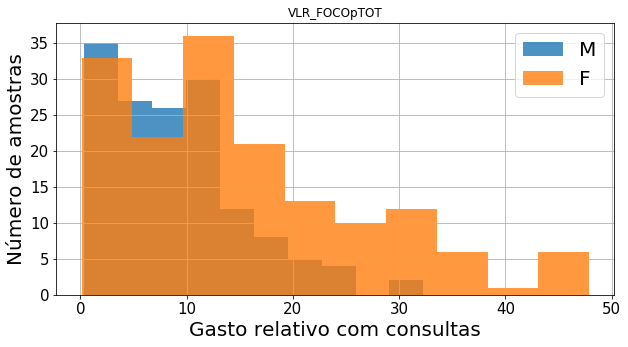

In [131]:
# Alguma faixa etária gasta mais com consultas?
fig, ax = plt.subplots(figsize=(10,5))
for i in np.unique(dfPF['CodFaixaEtaria']):
  dfPF[(dfPF['CodFaixaEtaria']==i)].hist(column='VLR_FOCOpTOT', ax=ax, label=str(i), alpha=0.8)
ax.set_xlabel('Gasto relativo com consultas', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

for i in np.unique(dfPF['CodFaixaEtaria']):
  fig, ax = plt.subplots(figsize=(10,5))
  dfPF[(dfPF['CodFaixaEtaria']==i) & (dfPF['SEXO_CAT']==1)].hist(column='VLR_FOCOpTOT', ax=ax, label='M', alpha=0.8)
  dfPF[(dfPF['CodFaixaEtaria']==i) & (dfPF['SEXO_CAT']==2)].hist(column='VLR_FOCOpTOT', ax=ax, label='F', alpha=0.8)
  ax.set_xlabel('Gasto relativo com consultas', fontsize=SizeLb)
  ax.set_ylabel('Número de amostras', fontsize=SizeLb)
  ax.grid(b=True)
  ax.tick_params(labelsize=SizeTk)
  ax.legend(fontsize=SizeLg)
  plt.show()

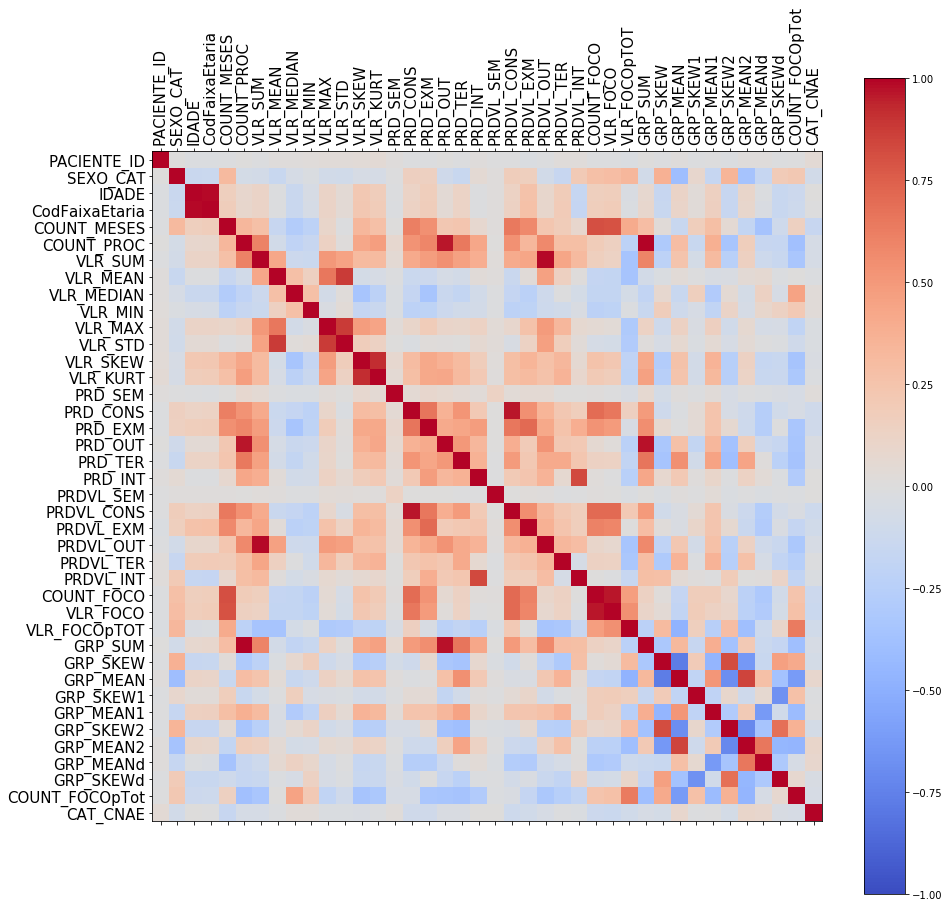

In [133]:
# Análise de correlação entre as variáveis dos pacientes
chemCorr = dfPF.corr()
namesCorr = chemCorr.columns

minCorr = -1

fig, ax = plt.subplots(figsize=(15,15))
cax = ax.matshow(chemCorr,cmap='coolwarm', vmin=minCorr, vmax=1)
fig.colorbar(cax)
ticksCorrPlot = np.arange(chemCorr.shape[0])
ax.set_xticks(ticksCorrPlot)
ax.set_yticks(ticksCorrPlot)
ax.set_xticklabels(namesCorr,rotation=90)
ax.set_yticklabels(namesCorr)
ax.tick_params(labelsize=SizeTk)
ax.grid(b=False)
plt.show()

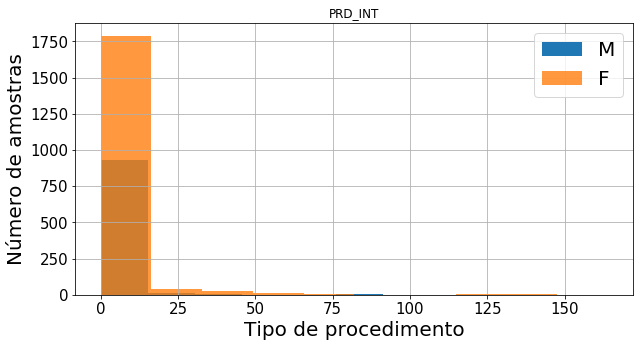

In [134]:
# Mulheres têm mais internação, mas pode ser relacionado à maternidade
fig, ax = plt.subplots(figsize=(10,5))
dfPF[(dfPF['SEXO_CAT']==1)].hist(column='PRD_INT', ax=ax, label='M')
dfPF[(dfPF['SEXO_CAT']==2)].hist(column='PRD_INT', ax=ax, label='F',alpha=0.8)
ax.set_xlabel('Tipo de procedimento', fontsize=SizeLb)
ax.set_ylabel('Número de amostras', fontsize=SizeLb)
# ax.set_title('Dados faltantes para tipo de trabalho', fontsize=SizeTt)
ax.grid(b=True)
ax.tick_params(labelsize=SizeTk)
ax.legend(fontsize=SizeLg)
plt.show()

In [135]:
dfPF.describe()

,PACIENTE_ID,SEXO_CAT,IDADE,CodFaixaEtaria,COUNT_MESES,COUNT_PROC,VLR_SUM,VLR_MEAN,VLR_MEDIAN,VLR_MIN,VLR_MAX,VLR_STD,VLR_SKEW,VLR_KURT,PRD_SEM,PRD_CONS,PRD_EXM,PRD_OUT,PRD_TER,PRD_INT,PRDVL_SEM,PRDVL_CONS,PRDVL_EXM,PRDVL_OUT,PRDVL_TER,PRDVL_INT,COUNT_FOCO,VLR_FOCO,VLR_FOCOpTOT,GRP_SUM,GRP_SKEW,GRP_MEAN,GRP_SKEW1,GRP_MEAN1,GRP_SKEW2,GRP_MEAN2,GRP_MEANd,GRP_SKEWd,COUNT_FOCOpTot,CAT_CNAE
count,2.835000e+03,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2.835000e+03,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2.835000e+03,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2660.000000,2707.000000,2824.000000,2828.000000,2700.000000,2649.000000,2835.000000,2835.000000
mean,2.152764e+09,1.661728,38.405769,5.583774,17.727690,266.184127,3.770480e+04,170.861268,35.056160,0.809160,4549.917153,498.104665,5.647406,51.100283,0.053968,32.394356,92.945326,106.241623,31.604586,2.944268,16.649788,3602.492998,3859.472236,2.284114e+04,6306.708899,1078.336183,26.303704,2976.248811,13.028824,678.149559,0.357968,2.357620,0.017668,2.107984,0.230107,2.424933,0.310979,0.228068,14.822302,0.895238
std,1.243295e+09,0.473205,10.209645,2.041632,7.308549,503.848633,7.055114e+04,183.949755,32.859195,1.468872,9541.021644,974.857512,3.474445,89.758896,0.944610,27.609416,78.672993,408.658985,65.743685,11.143213,724.811203,2787.530165,2999.860643,6.451312e+04,7797.153299,2507.263171,16.925545,1852.138166,7.946895,1490.957001,0.750027,0.344985,0.912674,0.377235,0.927009,0.390995,0.486406,1.243598,6.851128,1.427362
min,4.293611e+06,1.000000,17.762416,2.000000,1.000000,18.000000,1.752650e+03,14.254197,2.240000,0.000000,202.500000,41.509805,0.213658,-0.711666,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.065000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,-3.702339,1.712575,-6.164414,1.000000,-8.717762,1.000000,-1.929982,-8.648647,0.000000,0.000000
25%,1.073996e+09,1.000000,30.500000,4.000000,12.000000,106.000000,1.461170e+04,100.462813,16.155000,0.010000,1688.140000,238.771077,3.587388,13.950526,0.000000,17.000000,45.000000,13.500000,5.000000,0.000000,0.000000,1974.115000,1919.600000,4.652500e+03,1850.815000,0.000000,15.000000,1713.735000,6.884674,230.000000,-0.086375,2.072011,-0.325122,1.885714,-0.285006,2.116364,0.041919,-0.487038,10.128226,0.000000
50%,2.140030e+09,2.000000,37.200000,5.000000,18.000000,160.000000,2.003444e+04,134.349286,21.420000,0.010000,2162.580000,324.079076,4.577224,23.912670,0.000000,26.000000,76.000000,25.000000,11.000000,0.000000,0.000000,2978.850000,3117.260000,7.353830e+03,4839.570000,0.000000,23.000000,2591.840000,12.284863,364.000000,0.404920,2.278689,0.115884,2.000000,0.316256,2.341252,0.254348,0.145580,14.864865,0.000000
75%,3.218716e+09,2.000000,47.002703,7.000000,23.000000,253.000000,3.145132e+04,189.433863,44.000000,2.000000,3791.810000,502.114019,6.489556,49.779360,0.000000,40.000000,116.000000,65.000000,32.000000,2.000000,0.000000,4492.545000,4863.605000,1.561759e+04,7829.050000,1836.160000,34.000000,3787.395000,17.859414,604.000000,0.830716,2.582775,0.594936,2.282247,0.822118,2.677605,0.571276,0.833541,19.194813,1.000000
max,4.293790e+09,2.000000,57.932394,9.000000,35.000000,8079.000000,1.403795e+06,5682.787458,375.460000,21.220000,310000.000000,40337.914011,33.233236,1485.078186,29.000000,692.000000,1010.000000,6449.000000,1576.000000,164.000000,38415.940000,58518.670000,24951.560000,1.283735e+06,104657.000000,36184.550000,155.000000,14765.100000,50.678510,24347.000000,2.504706,3.653846,3.316625,3.833333,2.599951,3.770053,2.206490,7.045395,47.169811,5.000000


In [136]:
dfPF.head()

,PACIENTE_ID,SEXO_CAT,IDADE,CodFaixaEtaria,CNAE_ID,CNAE_DESCRICAO,COUNT_MESES,COUNT_PROC,VLR_SUM,VLR_MEAN,VLR_MEDIAN,VLR_MIN,VLR_MAX,VLR_STD,VLR_SKEW,VLR_KURT,PRD_SEM,PRD_CONS,PRD_EXM,PRD_OUT,PRD_TER,PRD_INT,PRDVL_SEM,PRDVL_CONS,PRDVL_EXM,PRDVL_OUT,PRDVL_TER,PRDVL_INT,COUNT_FOCO,VLR_FOCO,VLR_FOCOpTOT,GRP_SUM,GRP_SKEW,GRP_MEAN,GRP_SKEW1,GRP_MEAN1,GRP_SKEW2,GRP_MEAN2,GRP_MEANd,GRP_SKEWd,COUNT_FOCOpTot,CAT_CNAE
4,4293611,2.0,20.273381,2.0,NaN,NaN,25,139,18738.57,134.809856,63.09,0.01,1716.62,260.346057,4.110142,19.646096,0,43,63,26,7,0,0.0,4450.96,3621.45,4945.85,5720.31,0.00,39,4354.96,23.240621,275.0,0.565453,1.978417,0.577175,1.788732,0.364220,2.176471,0.387738,-0.212955,28.057554,0
5,6225781,2.0,38.069853,6.0,NaN,NaN,29,272,19076.70,70.134926,17.38,2.20,1569.07,166.935251,5.684980,38.122360,0,45,194,26,4,3,0.0,5032.69,5628.65,5543.95,859.47,2011.94,43,4718.97,24.736826,542.0,1.315252,1.992647,0.406758,1.943590,1.103421,2.116883,0.173293,0.696663,15.808824,0
8,6997852,1.0,32.697674,4.0,NaN,NaN,4,43,11555.78,268.739070,112.61,0.01,1989.63,448.008560,2.409704,5.826207,0,8,17,15,3,0,0.0,823.95,1113.01,6429.91,3188.91,0.00,5,486.12,4.206726,99.0,0.064060,2.302326,0.053224,1.923077,-0.198060,2.466667,0.543590,-0.251285,11.627907,0
9,8048727,2.0,50.187135,8.0,NaN,NaN,22,171,28036.90,163.958480,90.30,0.01,1683.43,276.827180,2.730463,8.077997,0,56,66,45,4,0,0.0,5934.78,2468.76,17584.31,2049.05,0.00,39,4222.06,15.058940,339.0,0.283279,1.982456,0.397268,2.020000,0.134538,1.929577,-0.090423,-0.262730,22.807018,0
10,9750699,2.0,55.293333,9.0,NaN,NaN,13,75,12405.81,165.410800,22.89,3.16,2159.73,412.182044,3.712489,13.811074,0,14,52,6,3,0,0.0,1853.08,3556.98,3283.36,3712.39,0.00,14,1853.08,14.937195,148.0,0.908296,1.973333,-0.080944,1.900000,1.100888,2.022222,0.122222,1.181832,18.666667,0


In [0]:
dfPF.to_csv('PacienteFilt.csv')

# CLUSTERING

In [0]:
def ElbowMethodKMeans(X,NClustersMax=21, TitleComp='', NInit=25, MaxInt=600, YLim=None, SizeLb = 20, SizeTk = 15, SizeTt = 25):
    """Elbow Method: Plots the distortion for each number of clusters. It is important to chose the number of clusters.
    
    Keyword arguments:
    X -- Data used for the clustering
    NClustersMax -- Number of possible clusters to be analyzed
    TitleComp -- Complement for the image title
    NInit -- Number of time the k-means algorithm will be run with different centroid seeds.
             The final results will be the best output of n_init consecutive runs in terms of inertia
    MaxInt -- Maximum number of iterations of the k-means algorithm for a single run
    YLim -- Min and max limit for the y label
    SizeLb -- Label font size
    SizeTk -- Tick label  font size
    SizeTt -- Title font size
    
    Bibliographic Review:
    .(Python Machine Learning, 2016)
    Intuitively, we can say that, if k increases, the distortion will decrease.
    This is because the samples will be closer to the centroids they are assigned to. The idea behind the
    elbow method is to identify the value of k where the distortion begins to increase most rapidly, which
    will become more clear if we plot distortion for different values of k.
    . (medium.com/datadriveninvestor/k-means-clustering-algorithm-its-application-ff9e97297e6e, 2018)
    Distortion (SSE) is the sum of the squared distance between each member of the cluster and its centroid.
    """
    # Varies the number of clusters in order to calculate the distorcion for each k
    Distortions = []
    for k in range(1, NClustersMax):
        km = KMeans(n_clusters=k, init='k-means++', n_init=25, max_iter=600)
        km.fit(X)
        Distortions.append(km.inertia_)
    
    # Plots the distortion for each k value
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(range(1,NClustersMax), Distortions, marker='o')
    ax.set_xlabel('Number of Clusters', fontsize=SizeLb)
    ax.set_ylabel('Distortion', fontsize=SizeLb)
    if YLim:
        ax.set_ylim(YLim)
    plt.title('Elbow Method Analysis' + TitleComp, fontsize=SizeTt)
    plt.grid(b=True)
    ax.tick_params(labelsize=SizeTk)
    plt.show()
    return None

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
# Diferentes algoritmos de clustering foram testados com diferentes variáveis de entrada
# As análises de clustering não foram muito conclusvias

In [0]:
X = dfPF[['GRP_MEAN','GRP_SUM','GRP_SKEW']] #,'SEXO_CAT','CodFaixaEtaria'

# Scaling the data using Standard Scaler
StdScaler = StandardScaler()
XStdSc = StdScaler.fit_transform(X)

In [0]:
# dfG = dfPaciente.copy()
dfG = dfPF.copy()

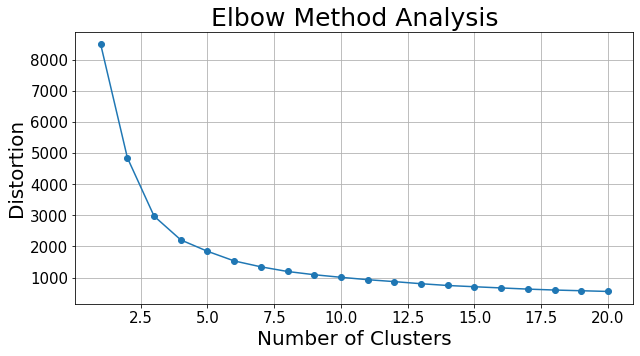

In [93]:
ElbowMethodKMeans(X=XStdSc,TitleComp='')

In [0]:
############# NUMBER OF CUSTERS #############
NClusters = 8

# Clustering
KM = KMeans(n_clusters=NClusters, init='random', n_init=50, max_iter=1000, tol=1e-07, random_state=0)
KM.fit(XStdSc)
dfG['Clusters'] = KM.labels_ # Which cluster each sample belong

In [95]:
dfG.groupby(['Clusters']).count()['PACIENTE_ID']

Clusters
0    483
1     22
2    185
3     86
4    704
5    831
6     15
7    509
Name: PACIENTE_ID, dtype: int64

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfG = dfG.select_dtypes(exclude=['object'])
df_scaled = pd.DataFrame(scaler.fit_transform(dfG),columns=dfG.columns)
df_scaled['Clusters'] = dfG['Clusters']
df_mean = (df_scaled.groupby('Clusters').mean())
df_mean

,PACIENTE_ID,SEXO_CAT,IDADE,CodFaixaEtaria,COUNT_MESES,COUNT_PROC,VLR_SUM,VLR_MEAN,VLR_MEDIAN,VLR_MIN,VLR_MAX,VLR_STD,VLR_SKEW,VLR_KURT,PRD_SEM,PRD_CONS,PRD_EXM,PRD_OUT,PRD_TER,PRD_INT,PRDVL_SEM,PRDVL_CONS,PRDVL_EXM,PRDVL_OUT,PRDVL_TER,PRDVL_INT,COUNT_FOCO,VLR_FOCO,VLR_FOCOpTOT,GRP_SUM,GRP_SKEW,GRP_MEAN,GRP_SKEW1,GRP_MEAN1,GRP_SKEW2,GRP_MEAN2,GRP_MEANd,GRP_SKEWd,COUNT_FOCOpTot
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.474012,0.638783,0.502848,0.502444,0.470029,0.030965,0.022161,0.027400,0.096954,0.034414,0.013485,0.010645,0.162352,0.034233,0.000262,0.045759,0.090942,0.017595,0.016850,0.012798,0.000001,0.060685,0.153772,0.014035,0.059860,0.026231,0.166196,0.195215,0.246712,0.025943,0.655897,0.324315,0.656855,0.385128,0.791889,0.505704,0.537601,0.565296,0.314870
1.0,0.485674,0.727273,0.499487,0.506494,0.582888,0.036213,0.072588,0.059085,0.053108,0.052652,0.018198,0.020992,0.148938,0.030635,0.006270,0.040331,0.112601,0.020249,0.019728,0.027162,0.000000,0.055924,0.188865,0.067348,0.070390,0.042096,0.160704,0.194371,0.183099,0.030933,0.639387,0.334875,0.653349,0.436792,0.791572,0.507228,0.507064,0.564524,0.261388
2.0,0.530728,0.701923,0.509564,0.509615,0.509050,0.034835,0.024179,0.024381,0.073385,0.039150,0.012837,0.009700,0.175645,0.046056,0.000332,0.043228,0.095135,0.019648,0.025332,0.025621,0.000000,0.058756,0.154736,0.015367,0.067224,0.038334,0.169107,0.204269,0.273484,0.030487,0.662234,0.335359,0.653170,0.395960,0.792076,0.523658,0.547005,0.565644,0.321538
3.0,0.504744,0.500000,0.562046,0.568182,0.495989,0.028541,0.020518,0.026323,0.094538,0.043184,0.017929,0.010528,0.181763,0.051377,0.000000,0.044305,0.102498,0.011877,0.019886,0.024252,0.000000,0.058844,0.173053,0.010459,0.077440,0.028256,0.174780,0.212479,0.273310,0.023485,0.656383,0.348627,0.645466,0.428277,0.790310,0.511936,0.514167,0.569138,0.315728
4.0,0.500108,0.661765,0.528663,0.527311,0.486808,0.032285,0.028757,0.026434,0.083434,0.039552,0.016058,0.011447,0.172213,0.038302,0.005832,0.045024,0.095515,0.017685,0.019941,0.018367,0.000160,0.059870,0.153068,0.021214,0.058818,0.031822,0.163741,0.194343,0.250404,0.027364,0.654123,0.334793,0.650202,0.391605,0.790380,0.515765,0.541997,0.566826,0.307162
5.0,0.496221,0.695464,0.510458,0.509411,0.501715,0.031689,0.029977,0.028073,0.084944,0.036589,0.014153,0.011565,0.165337,0.035468,0.002234,0.046546,0.093456,0.017175,0.019548,0.019794,0.000074,0.061753,0.164134,0.022128,0.060551,0.031066,0.173204,0.206530,0.255180,0.026776,0.648816,0.340745,0.645828,0.394329,0.788953,0.518998,0.542859,0.567015,0.304043
6.0,0.568296,0.700000,0.582771,0.585714,0.541176,0.075375,0.047206,0.026338,0.078253,0.044769,0.029143,0.016859,0.183064,0.038475,0.000000,0.060260,0.167030,0.049434,0.048858,0.106707,0.000000,0.076427,0.228121,0.037315,0.073738,0.053997,0.220645,0.252240,0.247921,0.069497,0.634396,0.351420,0.654945,0.462272,0.782671,0.463927,0.460613,0.557140,0.323359
7.0,0.517219,0.667820,0.498484,0.495304,0.493283,0.038960,0.030096,0.029680,0.088909,0.041247,0.013419,0.012089,0.158073,0.029841,0.002506,0.052268,0.089839,0.024753,0.025519,0.019959,0.000086,0.066147,0.146196,0.022544,0.058943,0.030831,0.165152,0.194469,0.243819,0.034225,0.651264,0.332960,0.649476,0.401699,0.787975,0.515511,0.534770,0.565820,0.309266


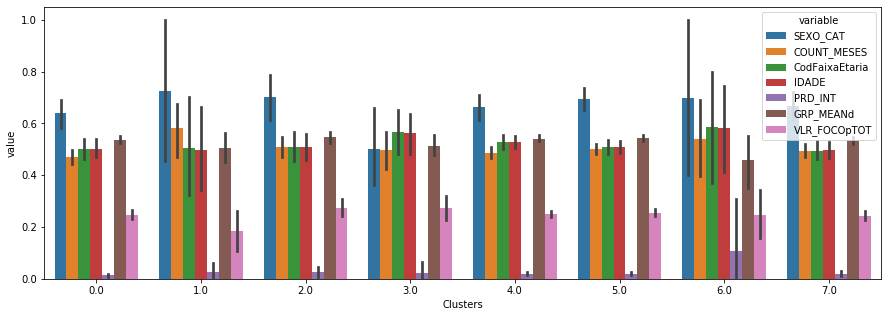

In [97]:
nVar = 7
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False,).head(nVar).Variable.values) + ['Clusters']
tidy = df_scaled[selected_columns].melt(id_vars='Clusters')
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='Clusters', y='value', hue='variable', data=tidy)

# REGRESSÃO

In [0]:
def DecisionTreeVisualization(Estimator, FeatureNames, TargetNames, FileName='Tree', Pp=True, Imp=True):
    """Create a dot file to visualize the decision trees.
    
    Keyword arguments:
    Estimator -- Estimator used for the prediction
    FeatureNames -- Name of the features of the X data frame
    TargetNames -- Possible targets
    FileName -- File name to save the .dot
    Pp -- When set to True, change the display of 'values' and/or 'samples' to be proportions and percentages respectively
    Imp -- When set to True, show the impurity at each node
    

    scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
    webgraphviz.com
    """
    export_graphviz(Estimator, out_file=FileName+'.dot', feature_names = FeatureNames, class_names = TargetNames,
                    proportion = Pp, impurity=Imp, rounded = True, precision = 2, filled = True)
    return print('Check the Decision Tree in the website: webgraphviz.com')

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

## FOCOpTot

In [0]:
# SEPARAÇÃO DOS DADOS
df = dfPF[['COUNT_FOCOpTot','SEXO_CAT','CodFaixaEtaria'] 
xTrain, xTest, yTrain, yTest = train_test_split(df.loc[:, df.columns != 'COUNT_FOCOpTot'],
                                                df['COUNT_FOCOpTot'], test_size = 0.2, random_state = 0)

In [165]:
DT = DecisionTreeRegressor(max_depth=6,min_samples_split=5,min_samples_leaf=2)
scoreDT = np.sqrt(-cross_val_score(DT, xTrain, yTrain, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))
scoreDT

array([7.0124523 , 6.31488454, 6.70059737, 6.80168651, 6.69944505])

In [166]:
DT.fit(xTrain,yTrain)
predictionDT = DT.predict(xTrain)
print(np.sqrt(mean_squared_error(yTrain,predictionDT)))
print(np.sqrt(mean_squared_error(yTrain,predictionDT))/yTrain.mean()*100)


6.696161209256249
44.73432566011913


In [167]:
predictionDTe = DT.predict(xTest)
print(np.sqrt(mean_squared_error(yTest,predictionDTe)))
print(np.sqrt(mean_squared_error(yTest,predictionDTe))/yTest.mean()*100)

6.6532158898987355
46.73324092359215


In [168]:
DecisionTreeVisualization(DT, xTrain.columns, 'FOCOpTot', FileName='TreeCOUNT_FOCOpTot_CNAE', Pp=False, Imp=False)

Check the Decision Tree in the website: webgraphviz.com


## Tree MEANd

In [0]:
# SEPARAÇÃO DOS DADOS
df = dfPF[['GRP_MEANd','SEXO_CAT','CodFaixaEtaria']].dropna()
xTrain, xTest, yTrain, yTest = train_test_split(df.loc[:, df.columns != 'GRP_MEANd'],
                                                df['GRP_MEANd'], test_size = 0.2, random_state = 0)

In [114]:
DT = DecisionTreeRegressor(max_depth=6,min_samples_split=5,min_samples_leaf=2)
scoreDT = np.sqrt(-cross_val_score(DT, xTrain, yTrain, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))
scoreDT

array([0.49650844, 0.48260485, 0.50431748, 0.47862485, 0.49063818])

In [115]:
DT.fit(xTrain,yTrain)
predictionDT = DT.predict(xTrain)
print(np.sqrt(mean_squared_error(yTrain,predictionDT)))
print(np.sqrt(mean_squared_error(yTrain,predictionDT))/yTrain.abs().mean()*100)

0.4857668463915817
110.62011031055168


In [116]:
predictionDTe = DT.predict(xTest)
print(np.sqrt(mean_squared_error(yTest,predictionDTe)))
print(np.sqrt(mean_squared_error(yTest,predictionDTe))/yTest.mean()*100)

0.44797095831970885
135.7954106687563


In [117]:
DecisionTreeVisualization(DT, xTrain.columns, 'Mean Diff', FileName='TreeMEANd', Pp=False, Imp=False)

Check the Decision Tree in the website: webgraphviz.com
